<a href="https://colab.research.google.com/github/fazalpge/AI-based-Smart-ERP-Next/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Python packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data/HRM_ML_Data_v1.xlsx")

df.head()

,EmployeeName,DesignationName,CurrentJobPosition,NumberofMonthsLastPromotions,Education,DepartmentName,TotalPromotions,Salary,lastSalaryHike,Age,Gender,MaritalStatus,Address,TotalYearCompany,TotalExperience
0,Ariful Islam,NaN,366,30,B.com,NaN,0,17550,NaN,53.0,Male,Married,"Dhonaid, Zirabo",366,366
1,Ful Mia Tukdar,Regional Manager,179,15,NaN,SUPPORT Operation,0,12500,NaN,NaN,Male,Married,NaN,179,179
2,Dipankur Chandra Das,Branch Manager,25,25,BA(Pass),SUPPORT Operation,1,6015,0.0,NaN,Male,NaN,NaN,93,93
3,Emran Hossain,Office Assistant,261,21,PSC,SUPPORT Operation,0,4224,NaN,NaN,Male,Married,NaN,261,261
4,Md. Ariful Islam,Field Officer,37,3,BA(Pass),SUPPORT Operation,0,6000,NaN,NaN,Male,NaN,NaN,37,37


# **Exploratory Data Analysis**
## **Assumptions:**

**Education:** Lower education status employees were laid off more than with higher education status

**Age:** Older employees were laid off more than younger employees

**Job Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Environment Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Relationship Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Years at company:** Employees who had less work experience in that company were laid off



**Work Life balance:** Employees with poor work life balance were laid off

**Job Involvement:** Employees with lower Job involvement were laid off

**Over Time:** Employees who never worked overtime were laid off


In [ ]:
df.shape

(168, 16)

# **Data Cleaning**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmployeeName                  168 non-null    object 
 1   DesignationName               167 non-null    object 
 2   CurrentJobPosition            168 non-null    int64  
 3   NumberofMonthsLastPromotions  168 non-null    int64  
 4   Education                     135 non-null    object 
 5   DepartmentName                167 non-null    object 
 6   TotalPromotions               168 non-null    int64  
 7   Salary                        168 non-null    int64  
 8   Attrition                     168 non-null    object 
 9   lastSalaryHike                22 non-null     float64
 10  Age                           100 non-null    float64
 11  Gender                        160 non-null    object 
 12  MaritalStatus                 154 non-null    object 
 13  Addre

In [ ]:
df.describe()

,CurrentJobPosition,NumberofMonthsLastPromotions,TotalPromotions,Salary,lastSalaryHike,Age,TotalYearCompany,TotalExperience
count,168.000000,168.000000,168.000000,168.000000,22.000000,100.000000,168.000000,168.000000
mean,188.160714,151.851190,0.130952,8830.125000,697.590909,31.930000,44.940476,44.940476
std,1869.910982,1872.269102,0.338357,8289.970717,789.644927,9.404765,43.506721,43.506721
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,11.750000,1.000000,0.000000,5500.000000,1.000000,26.000000,13.000000,13.000000
50%,33.500000,4.000000,0.000000,6015.000000,500.500000,30.000000,41.500000,41.500000
75%,65.000000,6.000000,0.000000,9563.000000,1015.000000,35.250000,65.000000,65.000000
max,24273.000000,24273.000000,1.000000,50499.000000,2029.000000,61.000000,366.000000,366.000000


In [ ]:
df.isnull().sum()

EmployeeName                      0
DesignationName                   1
CurrentJobPosition                0
NumberofMonthsLastPromotions      0
Education                        33
DepartmentName                    1
TotalPromotions                   0
Salary                            0
Attrition                         0
lastSalaryHike                  146
Age                              68
Gender                            8
MaritalStatus                    14
Address                          75
TotalYearCompany                  0
TotalExperience                   0
dtype: int64

In [ ]:
# drop null
#df = df.dropna()
#df.drop(["lastSalaryHike"],axis='columns', inplace=True)


In [20]:
df=df.ffill()

In [21]:
df.isnull().sum()

EmployeeName                    0
DesignationName                 1
CurrentJobPosition              0
NumberofMonthsLastPromotions    0
Education                       0
DepartmentName                  1
TotalPromotions                 0
Salary                          0
lastSalaryHike                  2
Age                             0
Gender                          0
MaritalStatus                   0
Address                         0
TotalYearCompany                0
TotalExperience                 0
cluster                         0
dtype: int64

In [ ]:
df


,EmployeeName,DesignationName,CurrentJobPosition,NumberofMonthsLastPromotions,Education,DepartmentName,TotalPromotions,Salary,lastSalaryHike,Age,Gender,MaritalStatus,Address,TotalYearCompany,TotalExperience
0,Ariful Islam,NaN,366,30,B.com,NaN,0,17550,NaN,53.0,Male,Married,"Dhonaid, Zirabo",366,366
1,Ful Mia Tukdar,Regional Manager,179,15,B.com,SUPPORT Operation,0,12500,NaN,53.0,Male,Married,"Dhonaid, Zirabo",179,179
2,Dipankur Chandra Das,Branch Manager,25,25,BA(Pass),SUPPORT Operation,1,6015,0.0,53.0,Male,Married,"Dhonaid, Zirabo",93,93
3,Emran Hossain,Office Assistant,261,21,PSC,SUPPORT Operation,0,4224,0.0,53.0,Male,Married,"Dhonaid, Zirabo",261,261
4,Md. Ariful Islam,Field Officer,37,3,BA(Pass),SUPPORT Operation,0,6000,0.0,53.0,Male,Married,"Dhonaid, Zirabo",37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,MD AMIR HAMZA MD AMIR HAMZA,Field Officer,2,0,HSC,SUPPORT Operation,0,12000,1000.0,22.0,Male,Unmarried,"chandotia, chandotia-7407-jessor sadar,jessore",2,2
164,MD Rabbi Hosssain md Rabbi,Field Officer,2,0,HSC,SUPPORT Operation,0,12000,1000.0,26.0,Male,Unmarried,"lebutola, lebutola-7400,jessore sadar,jessore",2,2
165,MD Sajib Hossain md sajib Hossin,Field Officer,1,0,HSC,SUPPORT Operation,0,12000,1000.0,27.0,Male,Unmarried,"lebutola,lebutola-7400,jessore sadar,jessore",1,1
166,MD Kamrul Islam md kamrul,Branch Manager,1,0,B.B.S,SUPPORT Operation,0,18000,1000.0,36.0,Male,Married,"purbo janiar bagan,joypurhat-5900,joypurhat sa...",1,1


In [ ]:
df.shape


(168, 15)

<ipython-input-6-7e9eaac1fdcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


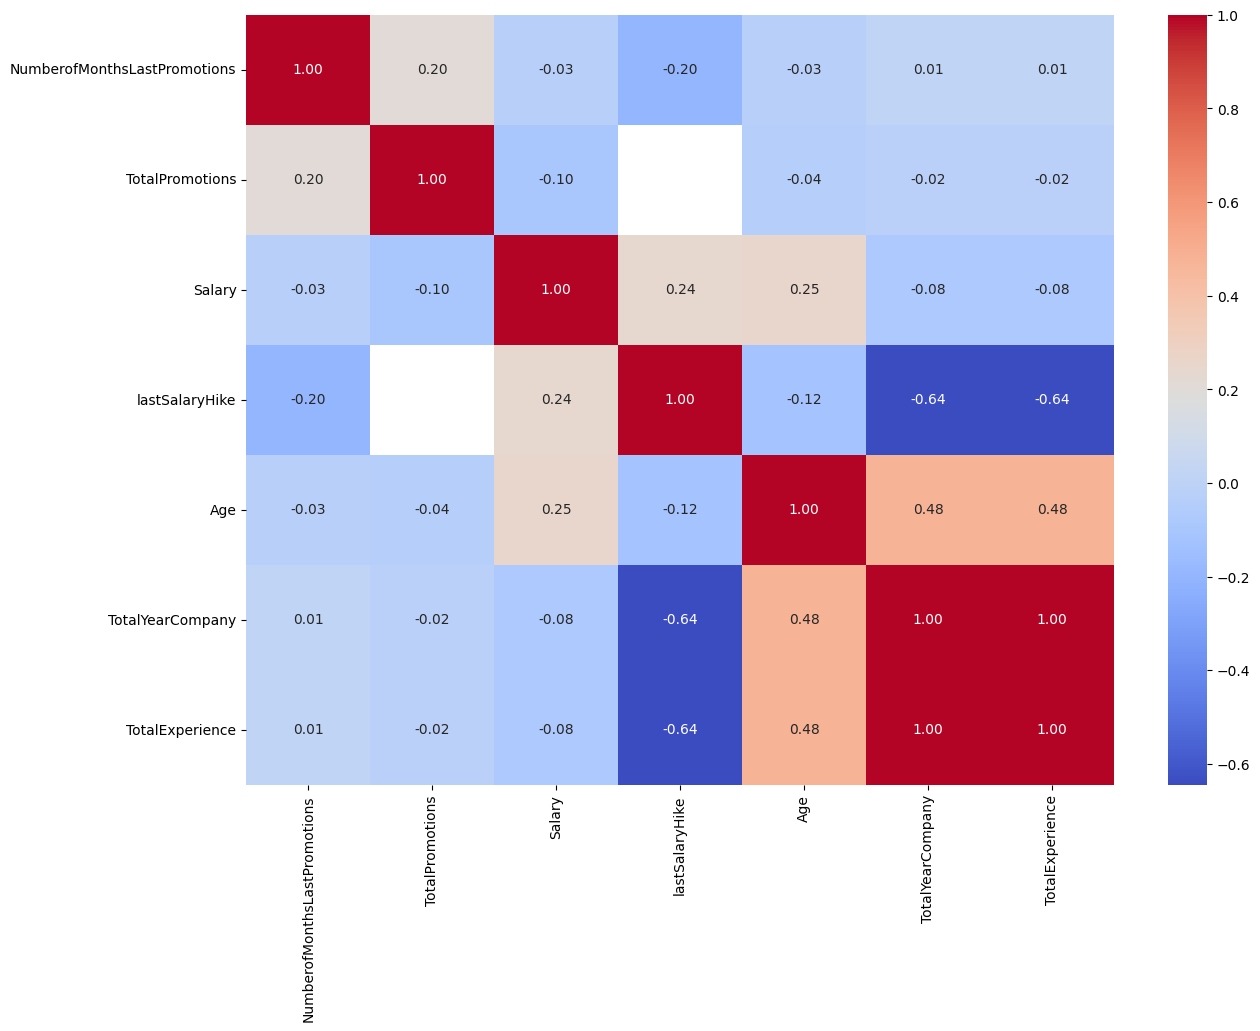

In [ ]:
# calculate the correlation matrix
correlation_matrix = df.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True)

plt.show()

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['DepartmentName', 'Gender'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Salary'], **{})
chart

In [ ]:
plt.style.use('fivethirtyeight')

**Ploting the Relation between Age , Salary**

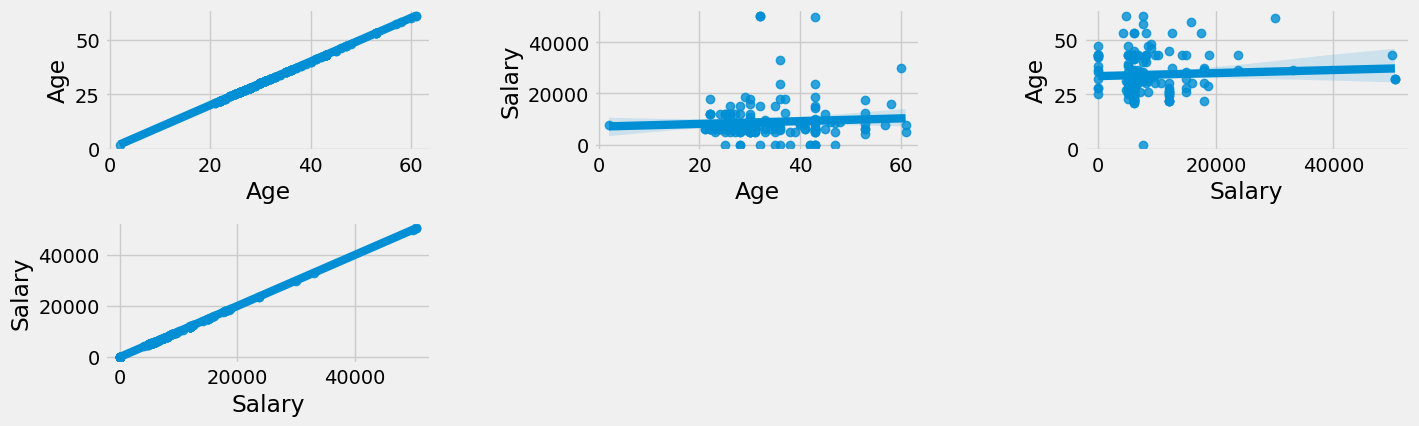

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Salary']:
    for y in ['Age' , 'Salary' ]:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

**Age , Salary with respect to Gender**


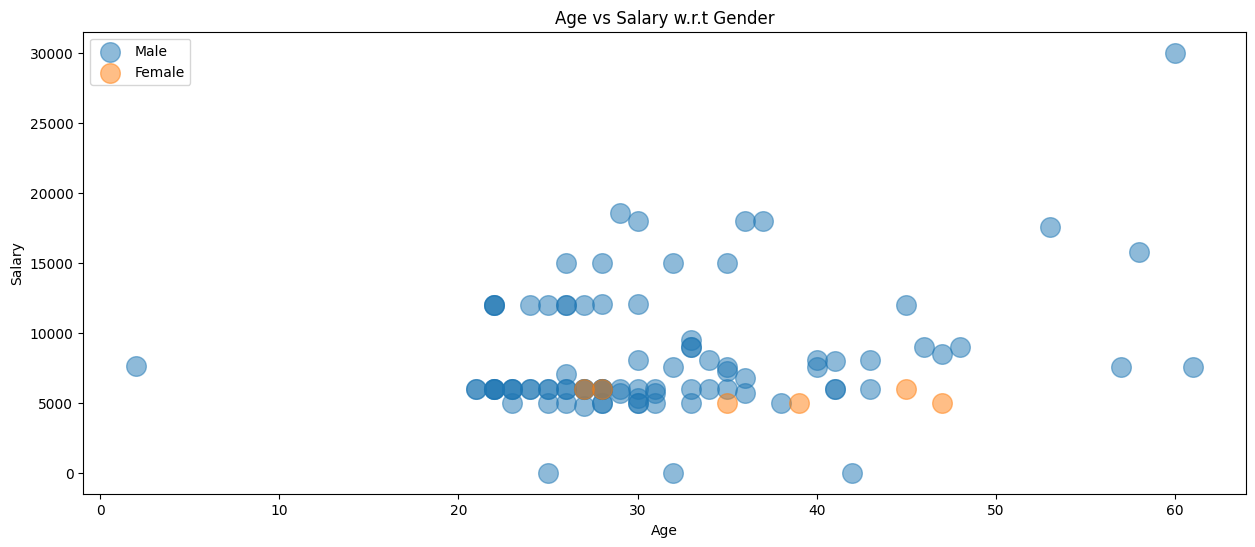

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for Gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Salary' , data = df[df['Gender'] == Gender] ,
                s = 200 , alpha = 0.5 , label = Gender)
plt.xlabel('Age'), plt.ylabel('Salary')
plt.title('Age vs Salary w.r.t Gender')
plt.legend()
plt.show()

# **Clustering using K- means**

**using Age and Salary**

In [ ]:
'''Age and Salary'''
X1 = df[['Age' , 'Salary']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


**Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)**

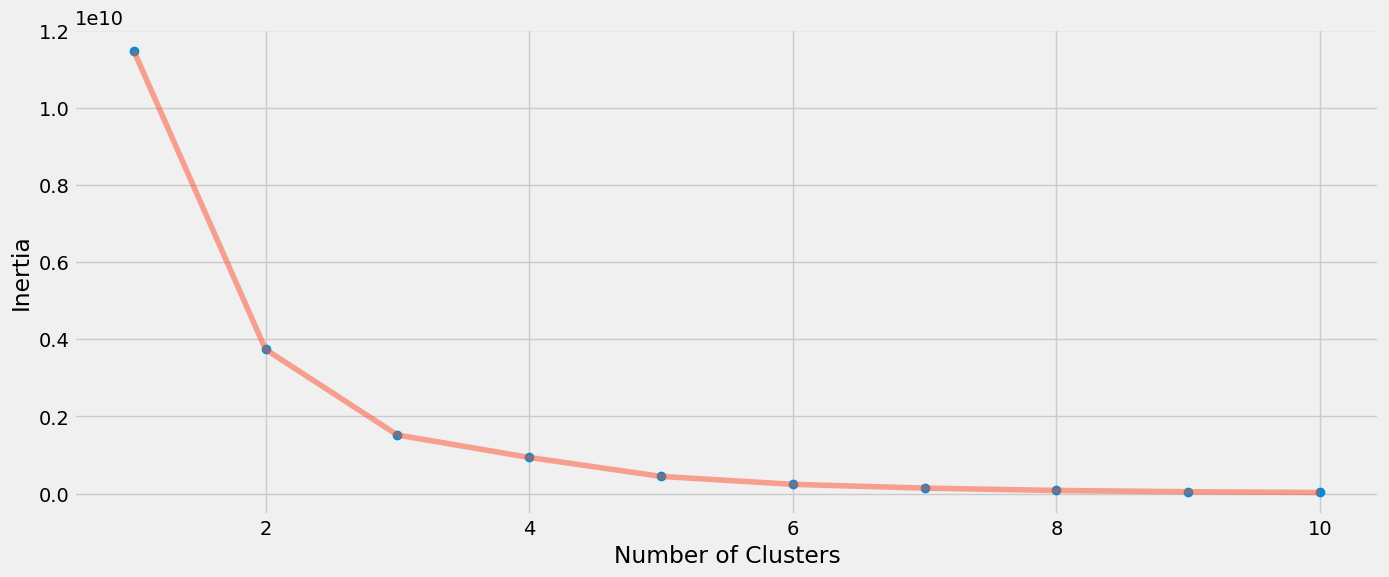

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Salary']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted

In [ ]:
km.cluster_centers_

array([[3.35428571e+01, 1.51229714e+04],
       [3.40078125e+01, 5.62171875e+03],
       [3.50000000e+01, 4.69154000e+04]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


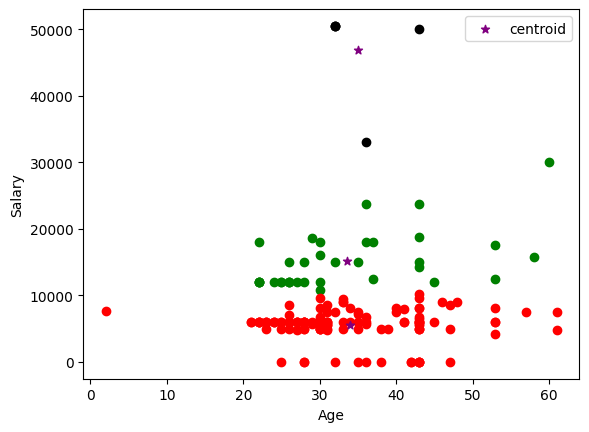

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Salary'],color='green')
y_predicted = km.fit_predict(df[['Age','Salary']])
plt.scatter(df2.Age,df2['Salary'],color='red')
plt.scatter(df3.Age,df3['Salary'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()